**ECOMMERCE DATA ANALYSIS**

**Project Aim:** This project aims to perform comprehensive data analysis on e-commerce data to derive valuable insights that can inform strategic decisions and enhance overall business performance.

**DATA CLEANING**

In [199]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import mysql.connector    #sql connector library

In [200]:
#connecting MySQL 
connection = mysql.connector.connect(
    host = 'localhost',
    user = 'root',   #my username
    password = '1234',   #my password
    database = 'ecommerce'   #database from where datas are to be fetched
)

In [201]:
#create a connection cursor object
cursor = connection.cursor()

In [202]:
cursor.execute("select * from customer")
cust_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from product")
prod_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])

cursor.execute("select * from order_details")
order_df=pd.DataFrame(cursor.fetchall(), columns = [col[0] for col in cursor.description])


cursor.close()
connection.close()

In [203]:
# Merge orders and products on 'product_id'
df_combined = pd.merge(order_df, prod_df[['product_id', 'category']], on='product_id', how='left')

# Merge the combined dataframe with customers on 'customer_id'
final_data = pd.merge(df_combined, cust_df[['customer_id', 'city']], on='customer_id', how='left')

# Display the merged dataframe
print(final_data)

    order_id customer_id product_id  quantity  total_price payment_mode  \
0          3       C1004       P112       1.0       1000.0          COD   
1          4       C1005       P102       1.0      20000.0          COD   
2          5       C1005       P102       1.0      20000.0          COD   
3          7       C1006       P103       1.0      55000.0          COD   
4          8       C1006       P102       1.0      15000.0          COD   
..       ...         ...        ...       ...          ...          ...   
71        91       C1063       P159       2.0       8000.0       Online   
72        92       C1064       P160       1.0       3000.0          COD   
73        93       C1065       P161       1.0       2500.0       Online   
74        94       C1066       P162       1.0       4000.0          COD   
75        95       C1067       P154       2.0       4000.0       Online   

   order_date order_status     category              city  
0  2023-11-30      Pending    Furniture

In [204]:
#fetching first 5 rows from customer table
cust_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [205]:
#fetching first 5 rows from product table
prod_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [206]:
#fetching first 5 rows from order table
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [207]:
# list of last five rows
cust_df.tail()

,customer_id,name,city,email,phone_no,address,pin_code
57,C1063,Sophia,Tokyo,sophia@gmail.com,5432123456,ss.tt.road,56789
58,C1064,Ethan,Lake Buena Vista,ethan@example.com,9876123456,2000 E Buena Vista Drive,32830
59,C1065,Oliver,Kanagawa,oliver@mail.com,1234987654,17F Ikenobecho,171
60,C1066,Aria,Sydney,aria@gmail.com,9876543210,uu.vv.road,75001
61,C1067,James,Tokyo,james@gmail.com,1234567890,ww.xx.road,56789


In [208]:
# list of last five rows
prod_df.tail()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
56,P158,Electric Toothbrush,Appliance,Electronics,4000.0,3000.0,18
57,P159,Car Vacuum,Appliance,Electronics,5000.0,4000.0,20
58,P160,Portable Speaker,Appliance,Electronics,3500.0,3000.0,22
59,P161,Smart Scale,Appliance,Electronics,3000.0,2500.0,20
60,P162,Streaming Device,Electronics,Accessories,5000.0,4000.0,18


In [209]:
# list of last five rows
order_df.tail()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
71,91,C1063,P159,2.0,8000.0,Online,2024-03-17,Delivered
72,92,C1064,P160,1.0,3000.0,COD,2024-03-18,Cancelled
73,93,C1065,P161,1.0,2500.0,Online,2024-03-19,Delivered
74,94,C1066,P162,1.0,4000.0,COD,2024-03-20,Delivered
75,95,C1067,P154,2.0,4000.0,Online,2024-03-21,Shipped


In [210]:
cust_df.shape

(62, 7)

In [211]:
prod_df.shape

(61, 7)

In [212]:
order_df.shape

(76, 8)

In [213]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [214]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [215]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


In [216]:
cust_df.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


In [217]:
prod_df.describe()

,original_price,selling_price,stock
count,61.000000,61.000000,61.000000
mean,21011.491639,17774.622623,23.852459
std,19078.897228,16643.506566,13.984320
min,500.000000,450.000000,10.000000
25%,6000.000000,5000.000000,15.000000
50%,15000.000000,12000.000000,20.000000
75%,30000.000000,25000.000000,28.000000
max,80000.000000,70000.000000,100.000000


In [218]:
order_df.describe()

,order_id,quantity,total_price,order_date
count,76.000000,76.000000,76.000000,76
mean,51.144737,1.355263,20873.684211,2024-02-02 03:28:25.263158016
min,3.000000,1.000000,450.000000,2023-11-23 00:00:00
25%,22.750000,1.000000,6500.000000,2024-01-02 18:00:00
50%,57.500000,1.000000,16500.000000,2024-02-12 12:00:00
75%,76.250000,2.000000,30000.000000,2024-03-02 06:00:00
max,95.000000,3.000000,90000.000000,2024-03-21 00:00:00
std,28.673660,0.558664,18442.574791,NaN


In [219]:
cust_df.nunique()

customer_id    62
name           39
city            4
email          52
phone_no       26
address        57
pin_code       21
dtype: int64

In [220]:
prod_df.nunique()

product_id        61
product_name      43
category           4
sub_category      22
original_price    25
selling_price     26
stock             14
dtype: int64

In [221]:
order_df.nunique()

order_id        76
customer_id     59
product_id      58
quantity         3
total_price     33
payment_mode     2
order_date      75
order_status     6
dtype: int64

In [222]:
#Display unique values in each column
for column in cust_df.columns:
    unique_values = cust_df[column].unique()
    print(f"Unique values in {column} column:")
    print(unique_values)
    print("\n")

Unique values in customer_id column:
['C1001' 'C1002' 'C1003' 'C1004' 'C1005' 'C1006' 'C1007' 'C1008' 'C1009'
 'C1010' 'C1011' 'C1012' 'C1013' 'C1014' 'C1015' 'C1016' 'C1017' 'C1018'
 'C1019' 'C1020' 'C1021' 'C1022' 'C1028' 'C1029' 'C1030' 'C1031' 'C1032'
 'C1033' 'C1034' 'C1035' 'C1036' 'C1037' 'C1038' 'C1039' 'C1040' 'C1041'
 'C1042' 'C1043' 'C1044' 'C1045' 'C1046' 'C1047' 'C1048' 'C1049' 'C1050'
 'C1051' 'C1052' 'C1053' 'C1054' 'C1055' 'C1056' 'C1057' 'C1058' 'C1059'
 'C1060' 'C1061' 'C1062' 'C1063' 'C1064' 'C1065' 'C1066' 'C1067']


Unique values in name column:
['Steve' 'john' 'Peter' 'Jackson' 'Jack' 'Wyatt' 'lilly' 'Sophia' 'Oliver'
 'Emma' 'William' 'Ava' 'Mia' 'Ethan' 'Harper' 'Alexander' 'Evelyn' 'Leo'
 'Lucy' 'Henry' 'Olivia' 'Michael' 'Lucas' 'Benjamin' 'Scarlett' 'Liam'
 'Chloe' 'Avery' 'Elijah' 'Aria' 'Elena' 'Carter' 'Sofia' 'James' 'Logan'
 'Luna' 'Aiden' 'Noah' 'Isabella']


Unique values in city column:
['Tokyo' 'Sydney' 'Kanagawa' 'Lake Buena Vista']


Unique values 

In [223]:
#Display unique values in each column
for column in prod_df.columns:
    unique_values = prod_df[column].unique()
    print(f"Unique values in {column} column:")
    print(unique_values)
    print("\n")

Unique values in product_id column:
['P102' 'P103' 'P104' 'P105' 'P106' 'P107' 'P108' 'P109' 'P110' 'P111'
 'P112' 'P113' 'P114' 'P115' 'P116' 'P117' 'P118' 'P119' 'P120' 'P121'
 'P122' 'P123' 'P124' 'P125' 'P126' 'P127' 'P128' 'P129' 'P130' 'P131'
 'P132' 'P133' 'P134' 'P135' 'P136' 'P137' 'P138' 'P139' 'P140' 'P141'
 'P142' 'P143' 'P144' 'P145' 'P146' 'P147' 'P148' 'P149' 'P150' 'P151'
 'P152' 'P153' 'P154' 'P155' 'P156' 'P157' 'P158' 'P159' 'P160' 'P161'
 'P162']


Unique values in product_name column:
['Chair' 'Laptop' 'Smartphone' 'Blender' 'Laptop HP' 'Samsung Galaxy'
 'Desk' 'Tablet' 'Microwave' 'Television' 'chair' 'Dining Table'
 'Refrigerator' 'Sofa' 'Digital Camera' 'Vacuum Cleaner' 'Headphones'
 'Desk Lamp' 'Printer' 'Recliner' 'Microwave Oven' 'Gaming Console'
 'Smartwatch' 'Projector' 'Coffee Maker' 'Sofa Set' 'Water Purifier'
 'Dishwasher' 'Air Purifier' 'Fitness Tracker' 'Smart Speaker' 'Monitor'
 'External Hard Drive' 'Bluetooth Speaker' 'Wireless Earbuds'
 'Portable C

In [224]:
#Display unique values in each column
for column in order_df.columns:
    unique_values = order_df[column].unique()
    print(f"Unique values in {column} column:")
    print(unique_values)
    print("\n")

Unique values in order_id column:
[ 3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95]


Unique values in customer_id column:
['C1004' 'C1005' 'C1006' 'C1003' 'C1009' 'C1008' 'C1010' 'C1011' 'C1013'
 'C1014' 'C1015' 'C1016' 'C1017' 'C1019' 'C1020' 'C1021' 'C1022' 'C1018'
 'C1012' 'C1028' 'C1029' 'C1030' 'C1031' 'C1032' 'C1033' 'C1034' 'C1035'
 'C1036' 'C1037' 'C1038' 'C1039' 'C1040' 'C1041' 'C1042' 'C1043' 'C1044'
 'C1045' 'C1046' 'C1047' 'C1048' 'C1049' 'C1050' 'C1051' 'C1052' 'C1053'
 'C1054' 'C1055' 'C1056' 'C1057' 'C1058' 'C1059' 'C1060' 'C1061' 'C1062'
 'C1063' 'C1064' 'C1065' 'C1066' 'C1067']


Unique values in product_id column:
['P112' 'P102' 'P103' 'P105' 'P108' 'P111' 'P113' 'P109' 'P110' 'P114'
 'P115' 'P116' 'P117' 'P118' 'P119' 'P120' 'P121' 'P122' 'P123' 'P124'
 'P125' 'P126' 'P127' 'P128' 'P129

In [225]:
#Replace 'delivered' with 'Delivered' in the 'order_status' column of order table
order_df['order_status'] = order_df['order_status'].replace('delivered', 'Delivered')
print('Updated Order Table')
order_df.head()

Updated Order Table


,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,Delivered


In [226]:
# Replace 'furniture' with 'Furniture' in the 'category' column of  product table
prod_df['category'] = prod_df['category'].replace('furniture', 'Furniture')
prod_df['category'] = prod_df['category'].replace('chairs', 'Chairs')
prod_df['pname'] = prod_df['product_name'].replace('chairs', 'Chairs')
print('Updated Product Table')
prod_df.head()

Updated Product Table


,product_id,product_name,category,sub_category,original_price,selling_price,stock,pname
0,P102,Chair,Furniture,Chairs,20000.0,15000.00,10,Chair
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50,Laptop
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20,Smartphone
3,P105,Blender,Appliance,Electronics,500.0,450.00,10,Blender
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50,Laptop HP


In [227]:
cust_df.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

In [228]:
prod_df.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
pname             0
dtype: int64

In [229]:
order_df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

In [230]:
#checking for duplicate values
dcust_rows = cust_df[cust_df.duplicated()].reset_index(drop = True)
print(dcust_rows)

Empty DataFrame
Columns: [customer_id, name, city, email, phone_no, address, pin_code]
Index: []


In [231]:
#checking for duplicate values
dprod_rows = prod_df[prod_df.duplicated()].reset_index(drop = True)
print(dprod_rows)

Empty DataFrame
Columns: [product_id, product_name, category, sub_category, original_price, selling_price, stock, pname]
Index: []


In [232]:
#checking for duplicate values
dorder_rows = order_df[order_df.duplicated()].reset_index(drop = True)
print(dorder_rows)

Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, total_price, payment_mode, order_date, order_status]
Index: []


In [233]:
# convert the date column into a datetime object
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# extract the day, month, and year components
order_df['Day'] = order_df['order_date'].dt.day
order_df['Month'] = order_df['order_date'].dt.strftime('%B')
order_df['Year'] = order_df['order_date'].dt.year

# show the modified data frame
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status,Day,Month,Year
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending,30,November,2023
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending,30,November,2023
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered,8,December,2023
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered,15,December,2023
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,Delivered,1,December,2023


**DATA ANALYSIS & VISUALIZATION**

**CUSTOMER ANALYSIS:**

**1. Identify the total number of customers city wise.**

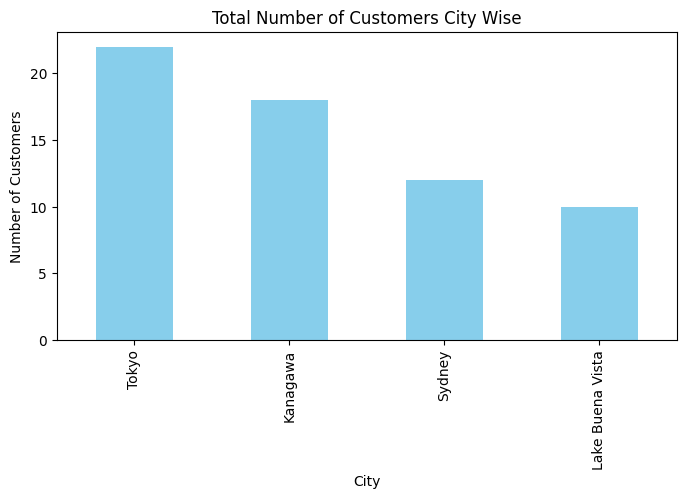

In [234]:
# Group by city and count the number of customers in each city
city_wise_customers = cust_df['city'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 4))
city_wise_customers.plot(kind='bar', color='skyblue')
plt.title('Total Number of Customers City Wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()


**INFERENCE : The 'value_count()' function  counts the occurrences of each unique city**

Here from this bar chart we can analyze-
1. Tokyo has the highest Number of customers 
2. Lake Buena Vista has the lowest Number of customers

**2. Identify the most frequent customers based on their order history.**

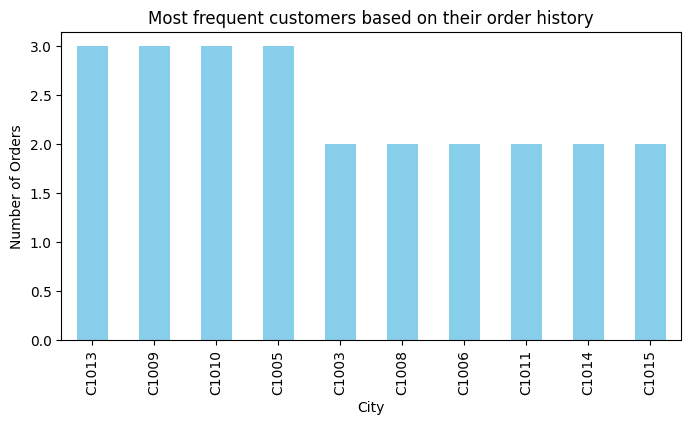

In [235]:
cust_order_counts = order_df['customer_id'].value_counts()
top10cust = cust_order_counts.head(10)

plt.figure(figsize=(8 , 4))
top10cust.plot(kind = 'bar',color='skyblue')

plt.title('Most frequent customers based on their order history')
plt.xlabel('City')
plt.ylabel('Number of Orders')

plt.show()

**INFERENCE : The 'value_count()' function  counts the occurrences of each customer_id**
 
Here we taking top 10 customers to count & from this bar chart we analyze-
1. The customer of customer_id C1013, C1009, C1010, C1005 are high number of orders 
2. The rest 6 customers are less than these 4 customers

**PRODUCT ANALYSIS**

**1. Determine the total number of products available by category**

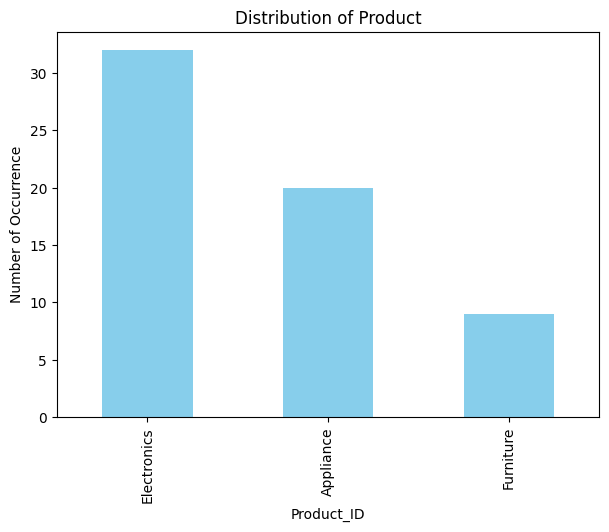

In [236]:
product_per_cat = prod_df['category'].value_counts()
plt.figure(figsize=(7 , 5))
product_per_cat.plot(kind = 'bar' , color='skyblue')
plt.title('Distribution of Product')
plt.xlabel('Product_ID')
plt.ylabel('Number of Occurrence')

plt.show()


**INFERENCE: The 'value_count()' function  counts the occurrences of each category**

Here by using the bar chart we analyze-
1. The 'Electronics' category has the high number of occurrence
2. The 'Furniture' category has les number of occurence

**2. Analyze the distribution of products across sub-categories.**

<Figure size 900x700 with 0 Axes>

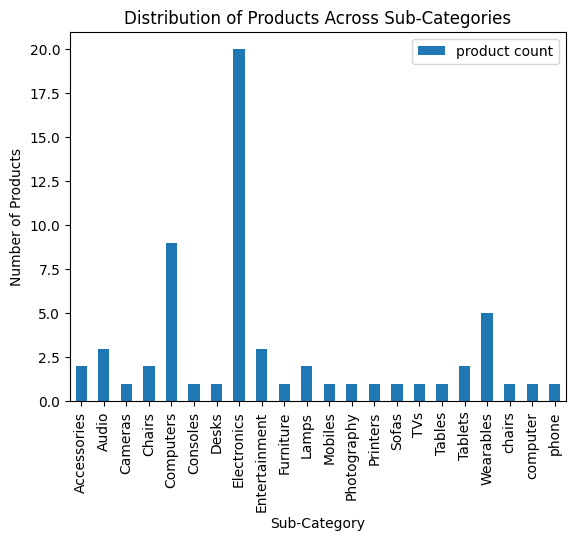

In [237]:
subcat = prod_df.groupby(['sub_category']).size().reset_index(name='product count')
plt.figure(figsize=(9 , 7))
subcat.plot(kind = 'bar' ,x='sub_category' , y='product count')
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')

plt.show()

**INFERENCE: The 'groupby()' function means rows with the same 'sub_category' value will be grouped together, size() function calculates the number of rows in group & resetindex() function adds a new column to the df with the name 'product count', containing the count of products in each 'sub_category'.**

Here by using the bar chart we analyze-
1. The 'Electronics' has the high number of occurrence

**3. Identify products with low stock levels.**

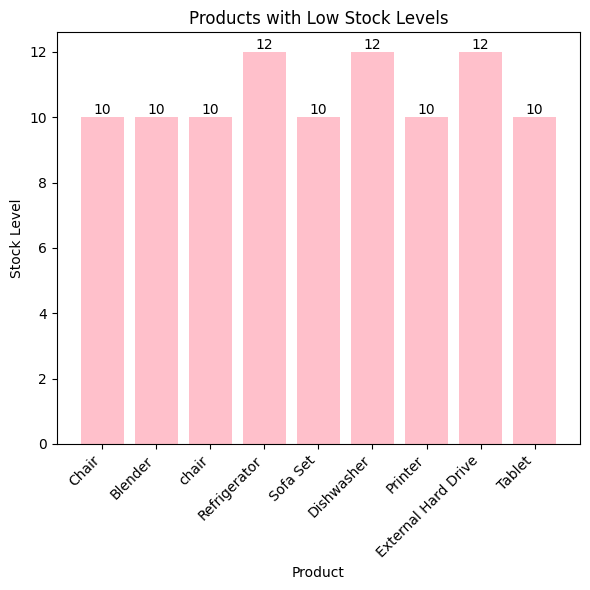

In [238]:
low_stock = 15
low_stock_prod = prod_df[prod_df['stock'] < low_stock]

# Create a bar chart
plt.figure(figsize=(6, 6))
plt.bar(low_stock_prod['product_name'], low_stock_prod['stock'], color='pink')
plt.xlabel('Product')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()

# Creating the bar chart and storing the collection of bars in the 'bars' variable
bars = plt.bar(low_stock_prod['product_name'], low_stock_prod['stock'], color='pink')
# Iterating over each bar in the collection
for bar in bars:
    yval = bar.get_height()  # Getting the height (y-coordinate) of the current bar
    # Adding text on top of the bar with the exact stock level
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the bar chart
plt.show()

**INFERENCE:**
Here by using the bar chart we analyze-
1. These products have low stock level
2. But among them refrigerator & dishwasher have a little more stock level compare to others i.e 12

**4. Calculate the average, maximum, and minimum selling prices for products.**

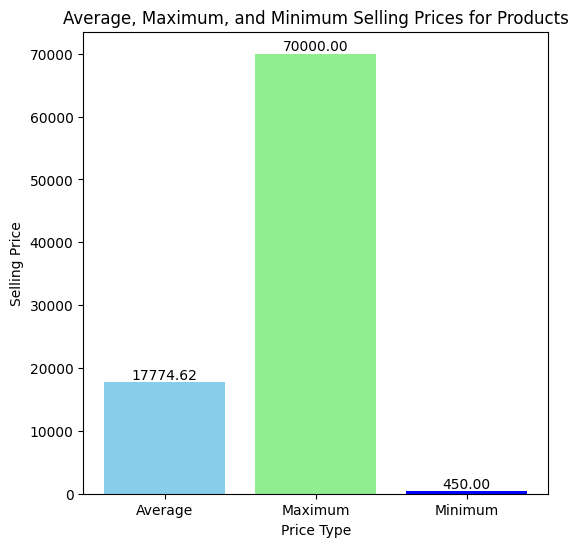

In [239]:
# Calculate average, maximum, and minimum selling prices
avg_price = prod_df['selling_price'].mean()
max_price = prod_df['selling_price'].max()
min_price = prod_df['selling_price'].min()

# Create a bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(['Average', 'Maximum', 'Minimum'], [avg_price, max_price, min_price], color=['skyblue', 'lightgreen', 'blue'])
plt.xlabel('Price Type')
plt.ylabel('Selling Price')
plt.title('Average, Maximum, and Minimum Selling Prices for Products')

# Add exact values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

**INFERENCE:**
Here by using the bar chart we analyze-
1. The maximum selling price of the products are 70000 or more than that.
2. Average selling price of products are ranging from 20000

**ORDER ANALYSIS**

**1. Calculate the top 10 orders product wise**

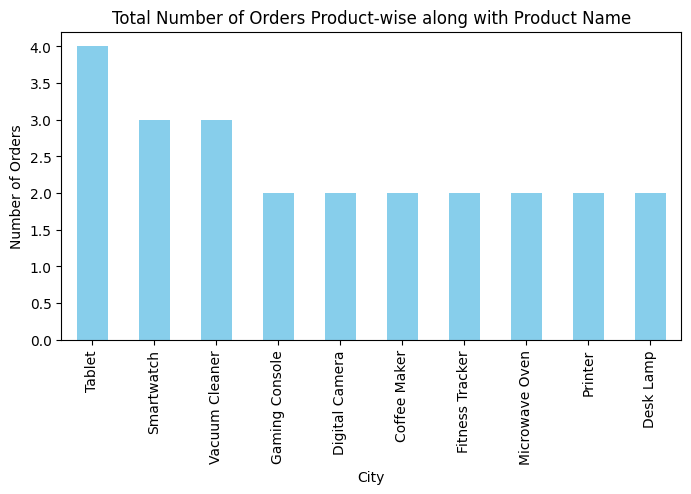

In [240]:
prod_wise_order = prod_df['product_name'].value_counts()
top10order = prod_wise_order.head(10)
# Plotting the bar chart
plt.figure(figsize=(8, 4))
top10order.plot(kind='bar', color='skyblue')
plt.title('Total Number of Orders Product-wise along with Product Name')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.show()

**INFERENCE:**
Here by using the bar chart we analyze the top 10 orders & we get-
1. Tablet has the maximum number of order i.e 4 or more than 4
2. Smartwatch & Vaccum Cleaner has order of no 3
3. & rest others are 2 or less than 2

**2. Analyze the order status distribution (e.g., pending, delivered).**

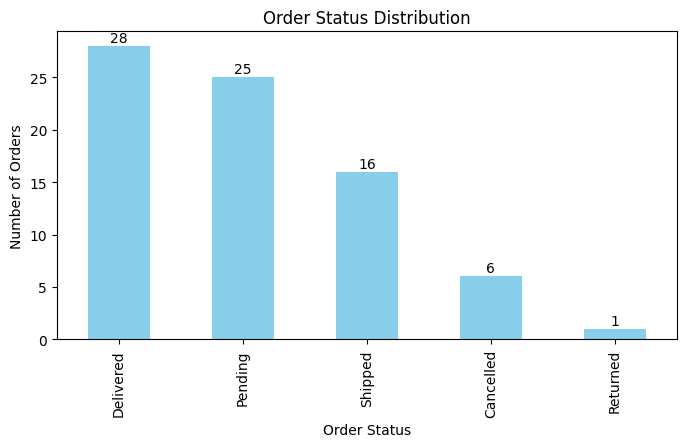

In [241]:
odr_status = order_df['order_status'].value_counts()
plt.figure(figsize=(8, 4))
ax = odr_status.plot(kind='bar', color='skyblue')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
# Display exact numbers on top of each bar
for i, v in enumerate(odr_status):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

**INFERENCE:**
Here by using the bar chart we are trying to track the order status distribution-
1. Rate of delivery distribution has highest i.e 28
2. After that Pending i.e 25 then shipped i.e. 16
3. Only rate of returned have 1 order distribution

**3. Identify the most popular products based on order quantity**

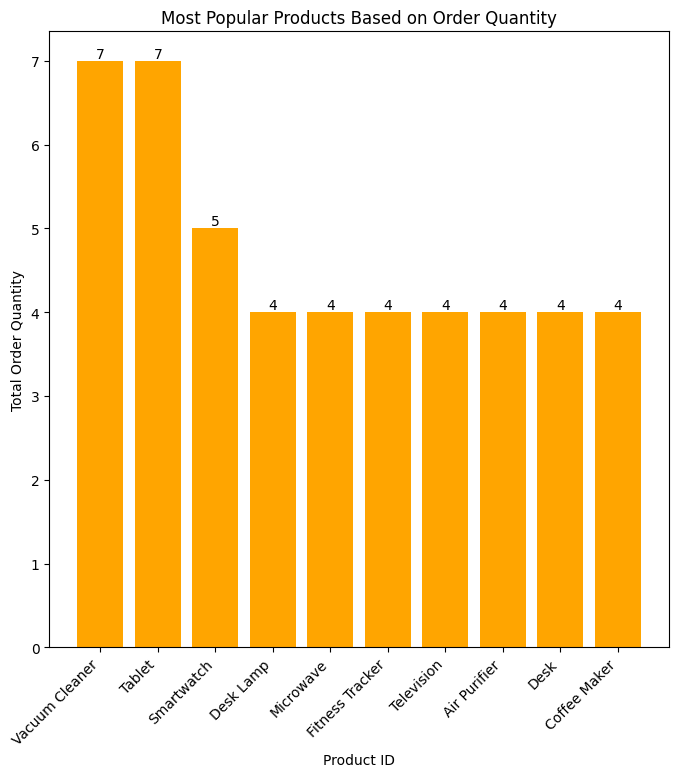

In [271]:
# Merge the product and order DataFrames on the 'product_id' column
merged_df = pd.merge(order_df, prod_df, on='product_id', how='inner')

# Calculate the total order quantity for each product
product_quantity = merged_df.groupby('product_name')['quantity'].sum().reset_index()

# Sort the DataFrame by total order quantity in descending order
# Sort the products by total quantity in descending order and select the top 10
product_quantity = product_quantity.sort_values(by='quantity', ascending=False).head(10)

# Plot the results as a bar chart
plt.figure(figsize=(8,8))
bars = plt.bar(product_quantity['product_name'], product_quantity['quantity'], color='orange')
plt.xlabel('Product ID')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Most Popular Products Based on Order Quantity')

# Add exact values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

**INFERENCE:**
Here by using the bar chart we are trying to track the top 10 products by quantity-
1. Vaccum Cleaner & Tablet has the highest no of quality i.e 7
2. After that Smartwatch i.e 5 
3. & the rest others have 4 no of quantity.

**SALES ANALYSIS**

**1. Calculate total revenue generated from orders product wise**

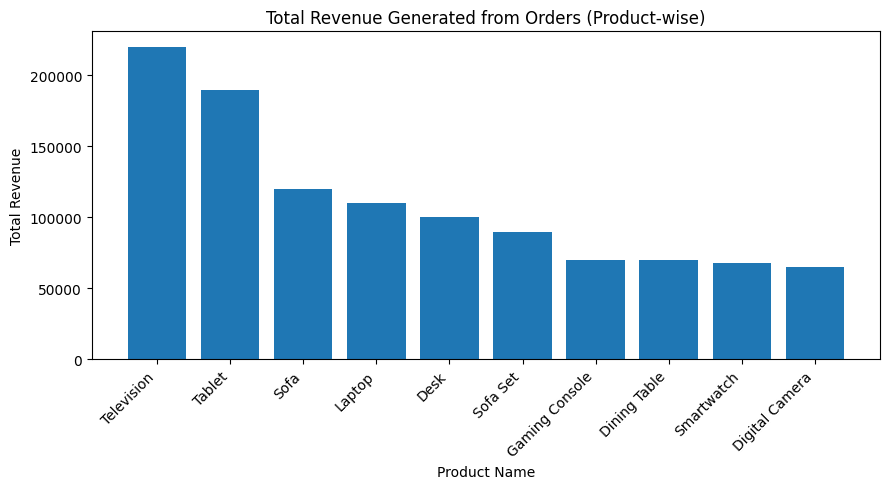

In [243]:
# Merge the two DataFrames on 'Product'
merged_df = pd.merge(order_df, prod_df, on='product_id')

# Calculate the total revenue for each product
merged_df['Total Revenue'] = merged_df['quantity'] * merged_df['selling_price']

# Group by 'Product' and sum the total revenue
revenue_by_product = merged_df.groupby('product_name')['Total Revenue'].sum().reset_index()

# Sort the DataFrame by total revenue in descending order
revenue_by_product = revenue_by_product.sort_values(by='Total Revenue', ascending=False).head(10)

# Plot the results as a bar chart
plt.figure(figsize=(9, 5))
plt.bar(revenue_by_product['product_name'], revenue_by_product['Total Revenue'])
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated from Orders (Product-wise)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**INFERENCE:**
Here by using the bar chart we are trying to track the top 10 total revenue of the products-
1. Television has the highest revenue i.e more than 200000
2. & after that tablet i.e more than 150000
3. After that sofa ,Laptop ,Desk & other products

**2. Calculate total revenue product category wise percentage.**

**INFERENCE:**
Here by using the pie chart we are trying to track which category has high & low revenue percentage-
1. Electronics has highest revenue percentage i.e 53.4%
2. & Appliance has lowest revenue percentage i.e 18.8%
4. Furniture has a revenue percentage of 27.7%

**3.  Calculate the total revenue generated from all orders**


Total Revenue 1586400.0


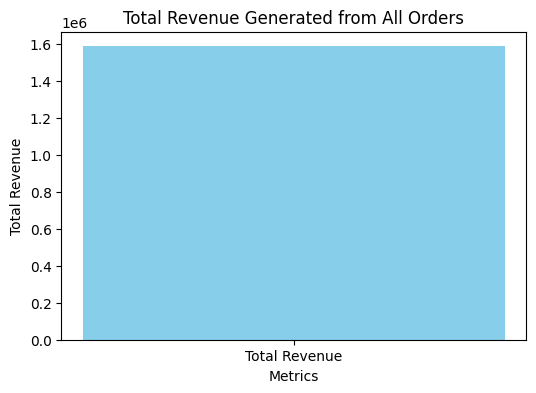

In [268]:
# Calculate the total revenue
total_revenue = order_df['total_price'].sum()
print('Total Revenue',total_revenue)
# Plotting a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Total Revenue'], [total_revenue], color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated from All Orders')
plt.show()

**4. Identify the most profitable products based on the difference between
original and selling prices.**

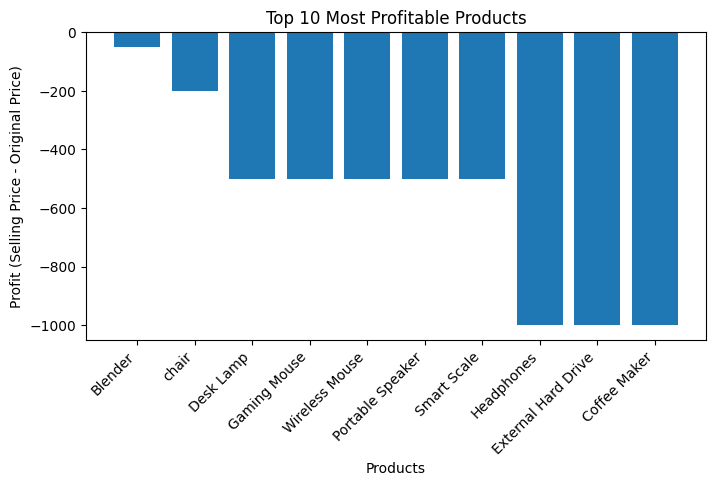

In [245]:
# Calculate the profit for each product
prod_df['Profit'] = prod_df['selling_price'] - prod_df['original_price']

# Identify the most profitable products (top N)
top_profitable_products = prod_df.nlargest(10, 'Profit')

# Plot a negative bar chart
plt.figure(figsize=(8, 4))
plt.bar(top_profitable_products['product_name'], top_profitable_products['Profit'])
plt.xlabel('Products')
plt.ylabel('Profit (Selling Price - Original Price)')
plt.title(f'Top {10} Most Profitable Products')
plt.xticks(rotation=45, ha='right')
plt.show()

**INFERENCE:**
Here by using the bar chart we are trying to track top 10 profitable products-
1. Blender has highest profit
2. & Coffee Maker has the lowest profit 

**CUSTOMER ORDER PATTERNS**

**1. Identify product names with the highest and lowest order quantities**

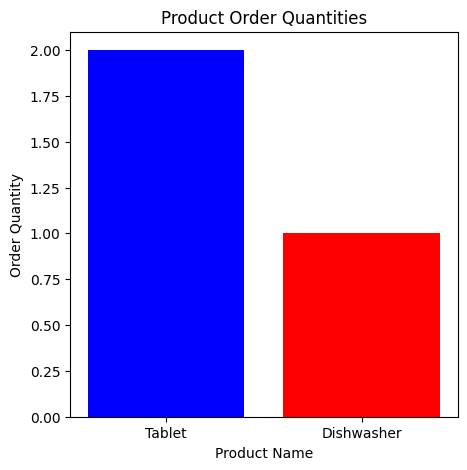

In [246]:
# Group by product and sum the quantity
product_quantity = merged_df.groupby('product_name')['quantity'].sum()

# Identify the product with the highest quantity
highest_quantity_product = product_quantity.idxmax()

# Identify the product with the lowest quantity
lowest_quantity_product = product_quantity.idxmin()

# Filter data for the two products
highest_lowest_data = merged_df[merged_df['product_name'].isin([highest_quantity_product, lowest_quantity_product])]

# Create a bar chart
plt.figure(figsize=(5, 5))
colors = ['red' if product == lowest_quantity_product else 'blue' for product in highest_lowest_data['product_name']]
plt.bar(highest_lowest_data['product_name'], highest_lowest_data['quantity'], color=colors)
plt.title('Product Order Quantities')
plt.xlabel('Product Name')
plt.ylabel('Order Quantity')

plt.show()

**INFERENCE:**
From this bar plot it is reveled that -
1. Tablet is sold more than the dishwasher.
2. The color blue is for Table & red is for Dishwasher

**2. Identify customers with the highest and lowest order quantities by customer name.**

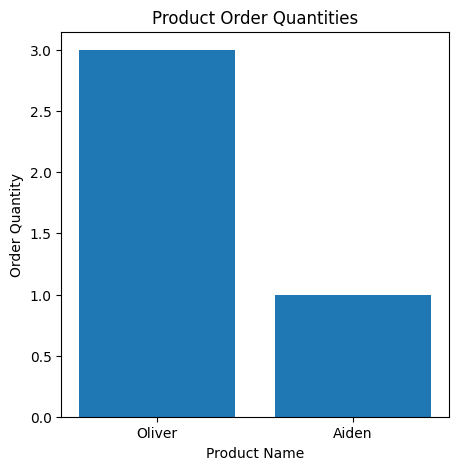

In [247]:
# Merge the two DataFrames on 'Product'
merge_CO_df = pd.merge(order_df, cust_df, on='customer_id')

# Group by product and sum the quantity
product_order = merge_CO_df.groupby('name')['quantity'].sum()

# Identify the product with the highest quantity
highest_customer_order = product_order.idxmax()

# Identify the product with the lowest quantity
lowest_customer_order = product_order.idxmin()

# Filter data for the two products
highest_lowest_customer = merge_CO_df[merge_CO_df['name'].isin([highest_customer_order, lowest_customer_order])]

# Create a bar chart
plt.figure(figsize=(5, 5))
plt.bar(highest_lowest_customer['name'], highest_lowest_customer['quantity'])
plt.title('Product Order Quantities')
plt.xlabel('Product Name')
plt.ylabel('Order Quantity')

plt.show()



**INFERENCE:**
From this bar plot it is reveled that -
1. Oliver is the most frequent customers, with the highest number of order quantity
2. & Aiden has less number order quantity

**3. Determine the most preferred payment modes.**

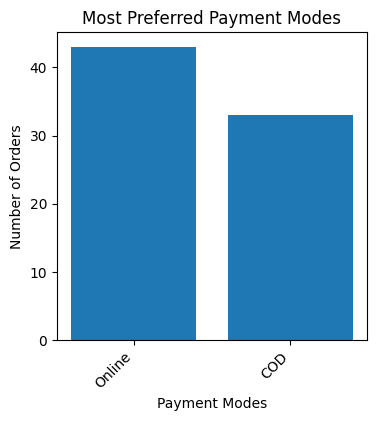

In [248]:
# Determine the most preferred payment modes
preferred_payment_modes = order_df['payment_mode'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(4, 4))
plt.bar(preferred_payment_modes.index, preferred_payment_modes.values)
plt.xlabel('Payment Modes')
plt.ylabel('Number of Orders')
plt.title('Most Preferred Payment Modes')
plt.xticks(rotation=45, ha='right')
plt.show()

**INFERENCE:**
From this bar plot it is reveled that -
1. Online payments is the most preferred payment mode, with the highest number of orders. i.e more than 40faction.

**TIME BASED ANALYSIS**

**1. Month wise total sales.**

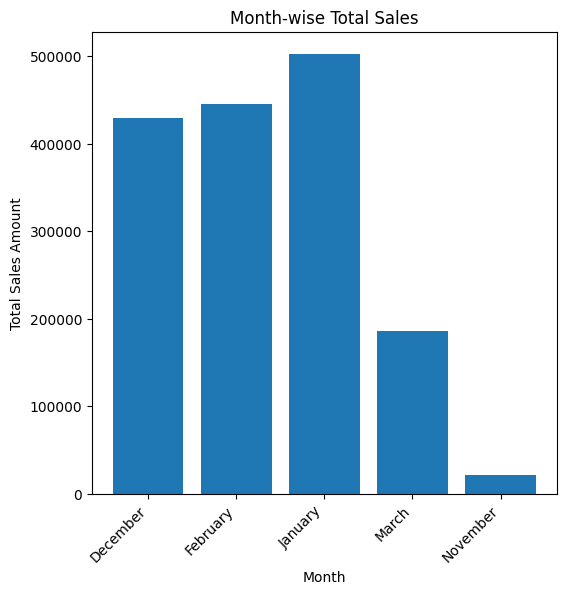

In [249]:
# Group by month and calculate total sales
monthly_total_sales = order_df.groupby('Month')['total_price'].sum()

# Plotting a bar chart
plt.figure(figsize=(6, 6))
plt.bar(monthly_total_sales.index, monthly_total_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

**INFERENCE:**
From this bar plot it is reveled that -
1. Total sales across different months only.
2. In the month of November the rate of total sales are low i.e less than 50000
3. & in the month of Januarythe rate of total sales are hight i.e more than 500000

**2. Month and year wise total sales**

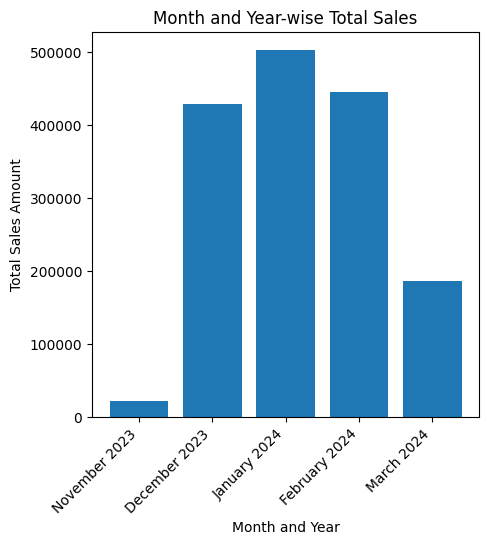

In [250]:
# Extract month and year from the 'order_date'
order_df['MonthYear'] = order_df['order_date'].dt.to_period('M')

# Extract formatted month and year labels
order_df['MonthYearLabel'] = order_df['order_date'].dt.strftime('%B %Y')

# Group by month and year, calculate total sales
monthly_total_sales = order_df.groupby(['MonthYear', 'MonthYearLabel'])['total_price'].sum()

# Plotting a bar chart
plt.figure(figsize=(5, 5))
plt.bar(monthly_total_sales.index.get_level_values('MonthYearLabel'), monthly_total_sales.values)
plt.xlabel('Month and Year')
plt.ylabel('Total Sales Amount')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

**INFERENCE:**
From this bar plot it is reveled that 
1. Total sales across different months and years.
2. In the month of January 2024 the rate of total sales are hight i.e more than 500000
3. & in the month of November 2023 the rate of total sales are low i.e less than 50000
4. & after February 2024 again the rate of sales are gradually decreases

**3. Identify peak order date**

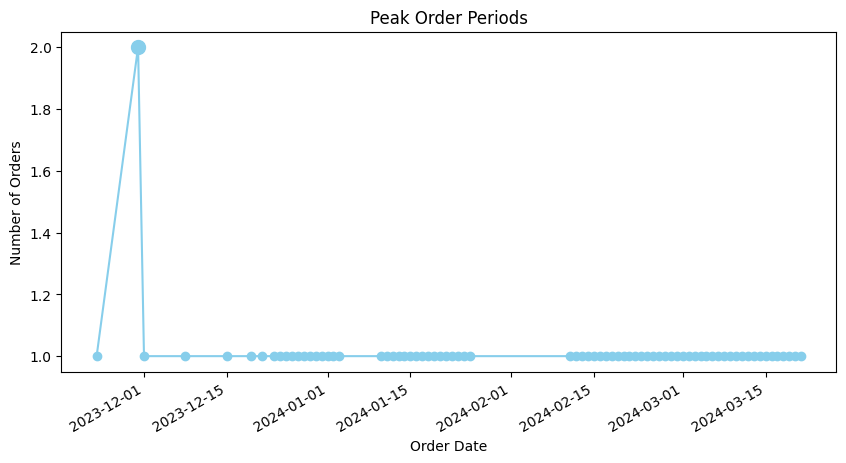

In [251]:
#Count the number of orders for each date
order_counts = order_df['order_date'].value_counts().sort_index()

# Visualize the results using a line chart
plt.figure(figsize=(10, 5))
order_counts.plot(kind='line', marker='o', color='skyblue')

# Identify the peak order date
peak_order_date = order_counts.idxmax()
peak_order_count = order_counts.max()

# Plot a red dot at the peak order date
plt.scatter(peak_order_date, peak_order_count, color='skyblue', s=100, zorder=5)

plt.title('Peak Order Periods')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')

plt.show()

**INFERENCE:**
From this scatter plot it reveals 
1. A Specific dates where orders peak are characterized by a higher concentration of data points.

**GEOGRAPHICAL ANALYSIS**

**1. Explore the distribution of customers across different cities.**

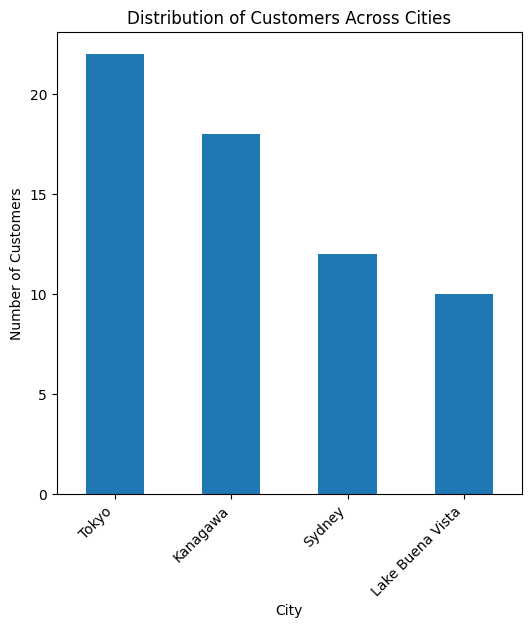

In [252]:
customer_distribution = cust_df['city'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(6, 6))
customer_distribution.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

**INFERENCE:**
Here by using the bar chart to analyse no of customers in which city-
1. Tokyo has high number of customer i.e more than 20
2. & Lake Buena Vista has less number of customer i.e less than 10 

**2. Analyze whether certain products or categories are more popular in a specific city.**

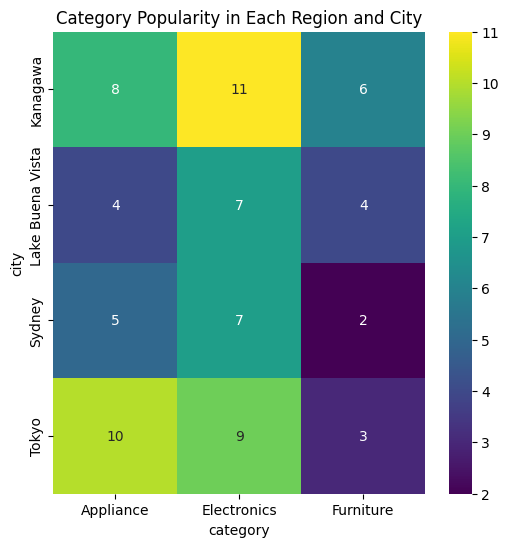

In [253]:
# Merge orders and products on 'product_id'
df_combined = pd.merge(order_df, prod_df[['product_id','category']], on='product_id', how='left')
final_data = pd.merge(df_combined, cust_df[['customer_id','city']], on='customer_id', how='left')

corelation_coefficient=final_data.groupby(['city','category']).size().unstack().fillna(0)

plt.figure(figsize=(6,6))

sns.heatmap(corelation_coefficient, cmap='viridis', annot=True)
plt.title('Category Popularity in Each Region and City')

plt.show()

**INFERENCE:**
Here by using the Correlation Heatmap analysis to analyse which category products are popular in which city- 
1. The darkest cells in the heatmap indicate the most popular product categories within each city.so 'Furniture' is popular in sydney
2. 'Electronics' is more popular in Kanagawa & 'Application' is more popular in Tokyo
3. The heatmap allows us to discern unique patterns of product category preferences in each city.

**PRODUCT PERFORMANCE**


**1. Identify the best-selling products**

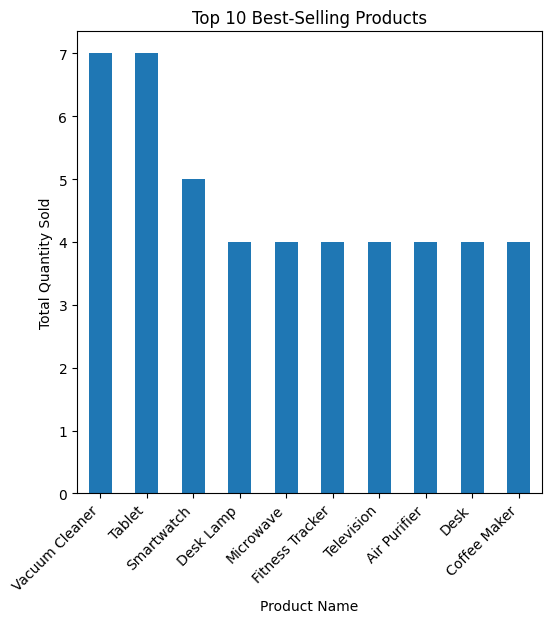

In [254]:
# Merge orders and products on 'product_id'
merged_df = pd.merge(order_df, prod_df[['product_id', 'product_name']], on='product_id', how='left')

# Group by product name and calculate total quantity sold
best_selling_products = merged_df.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

# Plotting a bar chart
plt.figure(figsize=(6, 6))
best_selling_products.head(10).plot(kind='bar')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45, ha='right')
plt.show()

**INFERENCE:**
Here by using the bar chart we are trying to track Top 10 best selling products-
1. Vaccum Cleaner & Tablet are the top 2 best selling products 
2. After that Smart Watch have & then others

**2. Identify top 10 slow-moving products based on low sales.**

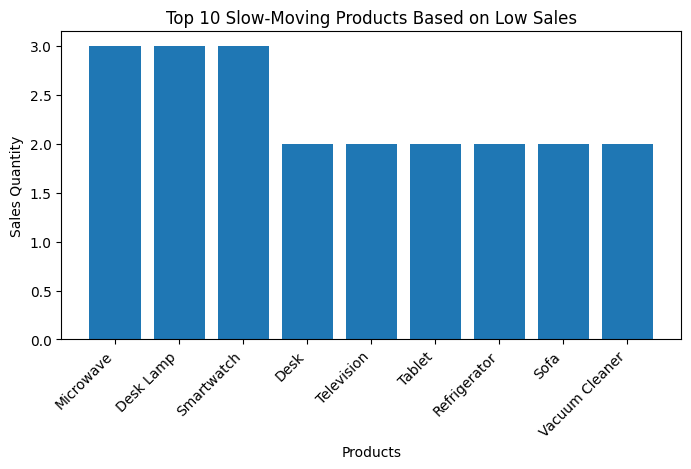

In [255]:
# Merge the two DataFrames based on the 'product_id' column
merged_df = pd.merge(order_df, prod_df, on='product_id')

# Identify top 10 slow-moving products based on low sales
top_slow_moving_products = merged_df.nlargest(10, 'quantity')

# Plotting a bar chart
plt.figure(figsize=(8, 4))
plt.bar(top_slow_moving_products['product_name'], top_slow_moving_products['quantity'])
plt.xlabel('Products')
plt.ylabel('Sales Quantity')
plt.title('Top 10 Slow-Moving Products Based on Low Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

**INFERENCE:**
Here by using the bar chart we are trying to track Products whose are in low Sales-
1. Microwave, Desk Lamp, Smart Watch have high sales
2. Others have low sales

**PAYMENT ANALYSIS**

**1. Display successful and pending payments order counts**

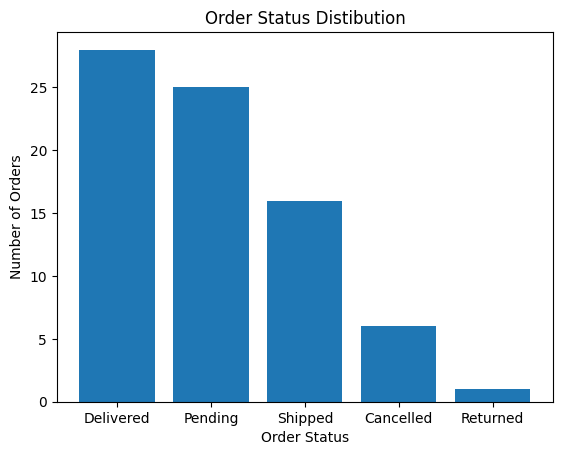

In [256]:
payment_counts = order_df['order_status'].value_counts()

# Plotting a bar chart
plt.bar(payment_counts.index, payment_counts.values)
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distibution')
plt.show()

**INFERENCE:**
Here by using the bar chart we are trying to track Order Status Distribution-
1. Most of the order are delivery & rate of delivery is 25+ 
2. But a few no of orders are also there that are returned i.e <5

**Explore a pie chart to represent the percentage distribution of different payment modes.**.

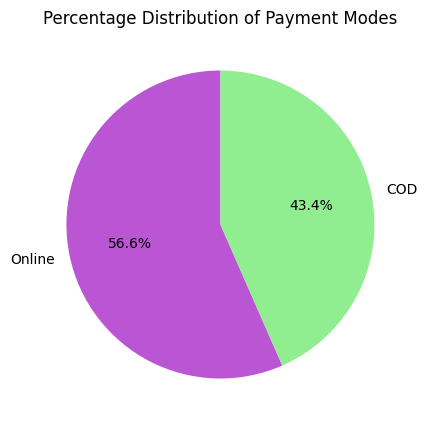

In [257]:
 #Assuming you have a DataFrame 'order_df' with a column 'payment_mode'
# Calculate the percentage distribution of different payment modes
payment_mode_distribution = order_df['payment_mode'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(payment_mode_distribution, labels=payment_mode_distribution.index, autopct='%1.1f%%', startangle=90, colors=['mediumorchid', 'lightgreen'])
plt.title('Percentage Distribution of Payment Modes')
plt.show()

**INFERENCE:**
From this bar plot it is reveled that -
1. Online payments is the most preferred payment mode, with the highest number of orders. i.e more than 40faction.

**Showing the distribution of the number of orders per customer.**

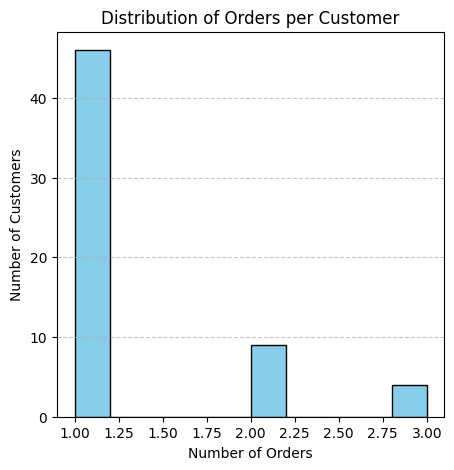

In [260]:
# Assuming you have a DataFrame 'order_df' with columns 'customer_id' and 'order_id'
# Count the number of orders per customer
orders_per_customer = order_df.groupby('customer_id')['order_id'].count().reset_index()

# Create a histogram
plt.figure(figsize=(5, 5))
plt.hist(orders_per_customer['order_id'], color='skyblue', edgecolor='black')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()

**INFERENCE :**
Here by using histogram we are trying to show-
1. There are more than 40 customers who purchase only one product 
2. & there are nearly 10 customers who purchase 2 products 
3. & there are less than 5 customers who purchase 3 products

**Investigate the impact of discounts on sales by creating charts that show the relationship between discounts and order quantities.**

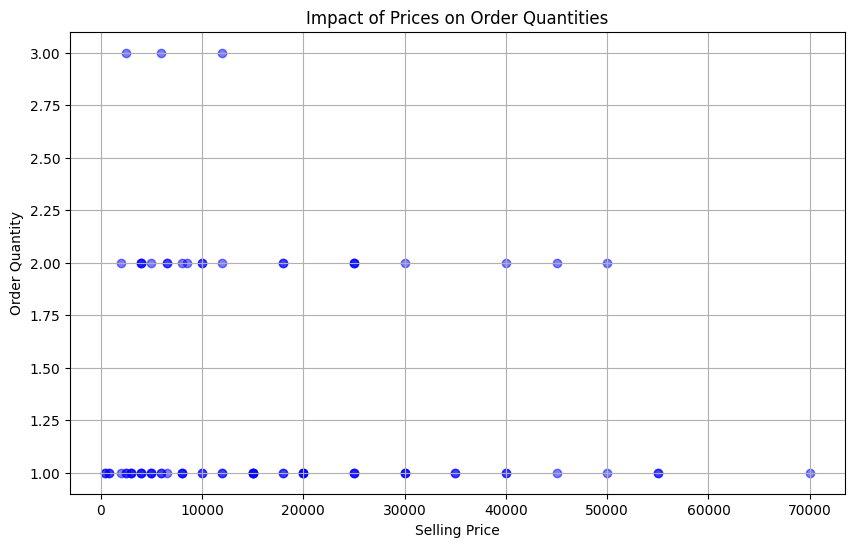

In [259]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['selling_price'], merged_df['quantity'], color='blue', alpha=0.5)
plt.title('Impact of Prices on Order Quantities')
plt.xlabel('Selling Price')
plt.ylabel('Order Quantity')
plt.grid(True)
plt.show()

**INFERENCE -**
1. This implies that higher prices are associated with lower order quantities. 
2. This also implies that the more price of product , the lesser the customer orders

**Identify the most lossable products based on the difference between original and selling prices.**

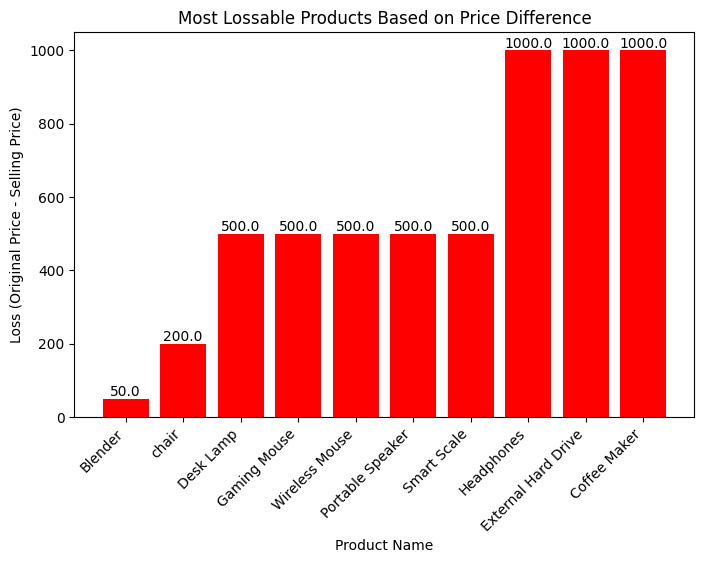

In [266]:
# Calculate the difference between original and selling prices
prod_df['loss'] = prod_df['original_price'] - prod_df['selling_price']

# Sort the DataFrame by loss in descending order
lossable_products = prod_df.sort_values(by='loss', ascending=False)
top_lossable_products = prod_df.nsmallest(10, 'loss')
# Plot the results as a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(top_lossable_products['product_name'], top_lossable_products['loss'], color='red')
plt.xlabel('Product Name')
plt.ylabel('Loss (Original Price - Selling Price)')
plt.title('Most Lossable Products Based on Price Difference')
plt.xticks(rotation=45, ha='right')

# Add exact values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

**INFERENCE:**
Here by using the bar chart we are trying to track top 10 profitable products-
1. Blender has less less i.e 50
2. & Coffee Maker has the high loss i.e 1000

**CONCLUSION**

The comprehensive analysis of the e-commerce dataset has yielded valuable insights into various aspects of the business. Here are key takeaways and conclusions:

**Sales Overview:**
1. The overall sales trend indicates positive growth over time.
2. Monthly and yearly total sales were visualized to identify peak periods and seasonality.
Product Performance:
3. Best-selling products were identified, helping in inventory management and marketing strategies.

**Customer Behavior:**
1. Order distribution per customer was explored to understand purchasing patterns.
2. Top customers contributing to revenue were identified through pie charts.
Payment Analysis:
3. Payment mode preferences were analyzed to determine successful and pending payments.

**Geographical Analysis:**
1. City-wise product popularity was visualized using heatmaps, offering insights for targeted marketing.

**Time-Based Analysis:**
1. Month-wise total sales were presented, aiding in understanding monthly trends.

**Discount Analysis:**
1. The impact of discounts on order quantities was explored, assuming a correlation between selling prices and order quantities.

**Further Suggestions:**
1. Exploring average transaction amounts for each payment mode.
2. Analyzing the distribution of different payment modes through pie charts.
3. Investigating the impact of discounts on sales, if applicable.

**Overall Recommendations:**

1. Utilize insights for targeted marketing strategies, optimizing inventory, and refining pricing strategies.
2. Consider implementing dynamic dashboards for real-time monitoring and decision-making.
3. Regularly update analyses to adapt to evolving market trends.

In conclusion, the in-depth analysis of this e-commerce dataset has not only provided a retrospective view of the business performance but has also illuminated pathways for strategic improvements.